In [5]:
import networkx as nx
import numpy as np

import holoviews as hv; hv.extension('bokeh', 'plotly', 'matplotlib', logo=False)
import panel as pn;     pn.extension('plotly', 'katex', 'mathjax')

from alg_graphs.alg_graphs import pr, draw_nxgraph, draw_nxmultigraph, format_matrix

<div style="float:center;width:100%;text-align: center;"><strong style="height:60px;color:darkred;font-size:40px;">Graphs and Adjacency Matrices</strong></div>

**Notebook Contents**

* This notebook defines and ilustrates various graph types, such as **simple graphs, directed graphs, and multigraphs**, are demonstrated with examples.
* It then introduces the concept of  **adjacency matrices**, a key representation of graphs in algebraic graph theory.
* It then uses powers of the Adjaceny Matrix to explore the number of paths between nodes,<br>
and relates these to eigenvalues of the matrix.

**Visualization**
* **networkx:**  draw_nx_graph, draw_nx_multigraph  (these use matplotlib)

# Definitions of Basic Graph Types

<div style="background-color:#F2F5A9;color:black;">

**Definition:** $\;\;$ A **graph**, denoted $G$, is defined as an ordered pair composed of two distinct sets:
* A set of **vertices** (or **nodes**), denoted $V(G)$
* A set of **edges**, denoted $E(G)$ consisting of ordered pairs of vertices from $V(G)$.

$\quad$ A **Digraph** is a Graph with a direction associated with an edge:<br>
$\qquad$ the edge $(v_1,v_2)$ leads from vertex $v_1$ to vertex $v_2$.

$\quad$ A **Multigraph** is a Graph with possible loops and possibly more than one edge<br>
$\qquad$ connecting vertices $u$ and $v$.
</div>

<div style="background-color:#F2F5A9;color:black;">

**Definition:**
* Vertices $u$ and $v$ are said to be **adjacent** if $E(G)$ contains an element $(u,g)$.
* A **path** is a set of one or more vertices 
where consecutive vertices are adjacent.
* Vertices $u$ and $v$ are said to be **connected** if there exists a **path** between them.
* A **walk** consists of an alternating sequence $v_1 e_1 v_2 e_2 \dots e_n v_n$ where the $v_i$ are vertices<br>
and $e_i$ are edges connecting $v_i$ and $v_{i+1}$.
</div>

<div style="background-color:#F2F5A9;color:black;">

**Definition:**
* The **order** of a graph $G$ refers to the number of vertices $\vert V(G) \vert>$
* the **size** of a graph $G$ refers to the number of edges $\vert E(G) \vert$
</div>

<div style="background-color:#F2F5A9;color:black;">

**Definition:** For a graph $G$ of order $n$, the **adjacency matrix**, denoted $A(G)$, of $G$<br>
$\qquad$ is an $n \times n$ matrix whose $(i,j)^{th}$ entry is given by<br><br>
$\qquad
A_{i j} = \left\{ \begin{align}
& 1, \qquad & \text{ if vertex }\; v_i\; \text{ is adjacent to vertex }\; v_j \\
& 0,        & \text{ otherwise}
\end{align}\right.
$

For Multigraphs and Multidigraphs, $A_{i j}$ is the number of edges from vertex $v_i$ to vertex $v_j$.
</div>

### Extension: Weighted Adjacency Matrix

A **weighted adjacency matrix** is a square matrix representation of a graph that not only indicates the presence of edges between vertices<br>
but also includes information about the weight or strength of those connections.

**Key Features:**
* **Dimensions:** For a graph with $n$ vertices, the weighted adjacency matrix is an $n \times n$ matrix.
* **Entries:** The entry $A_{i j}$ represents the weight of the edge from vertex $i$ to vertex $j$.
* **Non-edge representation:** If there's no edge between vertices, the corresponding entry is typically 0 or infinity, depending on the context.
* **Diagonal entries:** For simple graphs, diagonal entries are usually 0, but they can represent self-loops if present.

**Properties**
* **Symmetry:** For undirected graphs, the weighted adjacency matrix is symmetric $A^t=A$.
* **Non-negative entries:** Weights are often non-negative, but negative weights can represent costs or penalties in some applications.
* **Sparsity:** For sparse graphs, many entries will be zero, leading to potential storage optimizations.

## Example: A Graph

In [3]:
G = nx.Graph()
G.add_nodes_from(range(1,6))
G.add_edges_from([(1,2), (1,3), (2,3), (2,4), (2,5)])
A = nx.adjacency_matrix(G)

<strong style="font-size:20px;height:25px;color:blue;"><p>A Graph and its Adjacency matrix representation</p></strong>

<strong style="font-size:12px;height:25px;color:black;">Vertices {5,2,1,3,2} form a path</strong>

Row
    [0] Matplotlib(Figure, dpi=96, height=200)
    [1] Column
        [0] Spacer(height=50)
        [1] LaTeX(str, renderer='katex')
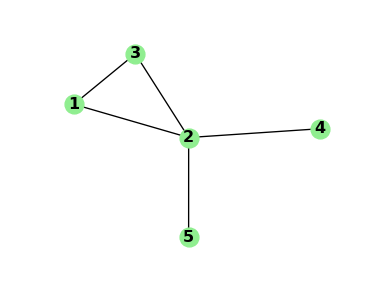

In [5]:
pr("<p>A Graph and its Adjacency matrix representation</p>")
pr("Vertices {5,2,1,3,2} form a path", color="black", sz=12)
pn.Row( pn.pane.Matplotlib( draw_nxgraph(G,layout=nx.spring_layout), dpi=96,  height=200),
        pn.Column(pn.Spacer(height=50),
        pn.pane.LaTeX( 'Adjacency Matrix $A(G) = '+format_matrix(A.toarray(), environment='array')+'$' )))

## Example: a Digraph

In [6]:
G = nx.DiGraph()
G.add_edges_from([(1, 1), (1, 7), (2, 1), (2, 2), (2, 3),
                  (2, 6), (3, 5), (4, 3), (5, 4), (5, 8),
                  (5, 9), (6, 4), (7, 2), (7, 6), (8, 7)])
def graph_info(G):
    # getting different graph attributes
    print("Total number of nodes: ",    int(G.number_of_nodes()))
    print("Total number of edges: ",    int(G.number_of_edges()))
    print("List of all nodes: ",        list(G.nodes()))
    print("List of all edges: ",        list(G.edges()))
    print("In-degree for all nodes: ",  dict(G.in_degree()))
    print("Out degree for all nodes: ", dict(G.out_degree))

    #print("Total number of self-loops: ", int(G.number_of_selfloops()))
    #print("List of all nodes with self-loops: ",
    #             list(G.nodes_with_selfloops()))

    print("List of all nodes we can go to in a single step from node 2: ", list(G.successors(2)))
    print("List of all nodes from which we can go to node 2 in a single step: ", list(G.predecessors(2)))

pr("<p>A Digraph and its Adjacency matrix representation</p>")
A = nx.adjacency_matrix(G)
pn.Row( pn.pane.Matplotlib( draw_nxmultigraph(G, layout=nx.planar_layout), dpi=96,  height=250),
        pn.Column(pn.Spacer(height=50),
        pn.pane.LaTeX( 'Adjacency Matrix $A(G) = '+format_matrix(A.toarray())+'$' )))

<strong style="font-size:20px;height:25px;color:blue;"><p>A Digraph and its Adjacency matrix representation</p></strong>

Row
    [0] Matplotlib(Figure, dpi=96, height=250)
    [1] Column
        [0] Spacer(height=50)
        [1] LaTeX(str, renderer='katex')

In [13]:
G = nx.MultiGraph()
for i in [(1,2,1), (2,3,2), (2,3,2), (3,4,1), (4,5,1), (4,5,2), (3,6,1), (6,7,1),  (7,8,1), (7,8,2), (6,9,1), (6,10,1), (6,10,2)]:
    G.add_edge(i[0], i[1], l = i[2])

pr("<p>A Multigraph and its Adjacency matrix representation</p>")
A = nx.adjacency_matrix(G)
pn.Row( pn.pane.Matplotlib( draw_nxmultigraph(G, arrows='-', layout=nx.planar_layout), dpi=96,  height=250),
        pn.Column(pn.Spacer(height=20),
        pn.pane.LaTeX( 'Adjacency Matrix $A(G) = '+format_matrix(A.toarray())+'$' )))

<strong style="font-size:20px;height:25px;color:blue;"><p>A Multigraph and its Adjacency matrix representation</p></strong>

Row
    [0] Matplotlib(Figure, dpi=96, height=250)
    [1] Column
        [0] Spacer(height=20)
        [1] LaTeX(str, renderer='katex')

## Example: a Multidigraph

In [8]:
G = nx.MultiDiGraph()
[G.add_node(n) for n in range(1,6)]
G.add_edge(1, 2, label=1)
G.add_edge(1, 1, label=0)
G.add_edge(1, 2, label=11)
G.add_edge(1, 3, label=2)
G.add_edge(1, 4, label=3)
G.add_edge(4, 5, label=34)
G.add_edge(5, 1, label=51)
G.add_edge(3, 2, label=32)

pr("<p>A MultiDigraph and its Adjacency matrix representation</p>")
pr("display routine bug: the loop at node 1 is no shown", sz=10, color="black")
A = nx.adjacency_matrix(G)
pn.Row( pn.pane.Matplotlib( draw_nxmultigraph(G, nx.spring_layout, arrows="->" ), dpi=96,  height=250),
        pn.Column(pn.Spacer(height=50),
        pn.pane.LaTeX( 'Adjacency Matrix $A(G) = '+format_matrix(A.toarray())+'$' )))

<strong style="font-size:20px;height:25px;color:blue;"><p>A MultiDigraph and its Adjacency matrix representation</p></strong>

<strong style="font-size:10px;height:25px;color:black;">display routine bug: the loop at node 1 is no shown</strong>

Row
    [0] Matplotlib(Figure, dpi=96, height=250)
    [1] Column
        [0] Spacer(height=50)
        [1] LaTeX(str, renderer='katex')

# Powers of the Adjacency Matrix

**Remark:** For a given graph or multigraph $G$, the adjacency matrix
* is symmetric (and hence has an orthogonal eigendecomposition)
* has trace equal to the number of loops in $G$

## 2.1 Multiplication $v^t A^k$

### Example: Number of Vertices accessible in $k$ Steps

<strong style="font-size:20px;height:25px;color:blue;"><p>A Graph and its Adjacency matrix representation</p></strong>

<strong style="font-size:20px;height:25px;color:black;">Vertices {1,3,2,4} form a path</strong>

Row
    [0] Matplotlib(Figure, dpi=96, height=200)
    [1] Column
        [0] Spacer(height=50)
        [1] LaTeX(str, renderer='katex')
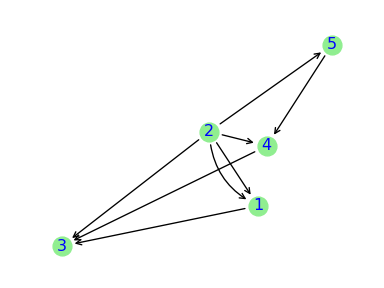

In [15]:
G = nx.MultiDiGraph()
G.add_nodes_from(range(1,6))
G.add_edges_from([(2,1), (1,3), (2,3), (2,4), (2,5), (5,4), (4,3)])
G.add_edge(2,1)
A = nx.adjacency_matrix(G)

pr("<p>A Graph and its Adjacency matrix representation</p>")
pr("Vertices {1,3,2,4} form a path", color="black")
pn.Row( pn.pane.Matplotlib( draw_nxmultigraph(G, nx.spring_layout), dpi=96,  height=200),
        pn.Column(pn.Spacer(height=50),
        pn.pane.LaTeX( 'Adjacency Matrix $A(G) = '+format_matrix(A.toarray())+'$' )))

Consider the vector $v = \begin{pmatrix}0\\1\\0\\0\\0\end{pmatrix}$ representing the second node<br>
$\qquad$ and note that $A^t v$ returns the vector of nodes reachable in a single step,<br>
$\qquad$ starting from the node specified in $v$.

More generally, $\left( A^t \right)^k v$ returns the vector of nodes reached in exactly $k$ steps.

In [16]:
v=np.array([[0,1,0,0,0]]).T
(v.T@A)

array([[2, 0, 1, 1, 1]])

The paths to reach a given node in one step starting from node 2 are
* 1:   $\quad 2 \rightarrow 1$ along each of 2 edges
* 2:   $\quad$ no loop at 2
* 3:   $\quad 2 \rightarrow 3$
* 4:   $\quad 2 \rightarrow 4$
* 5:   $\quad 2 \rightarrow 5$

In fact, each entry $(i,j)$ in $A^k$ records the number of possible paths from node i to node j.

In [17]:
pr("Consider A^2")
(A@A).todense()

<strong style="font-size:20px;height:25px;color:blue;">Consider A^2</strong>

array([[0, 0, 0, 0, 0],
       [0, 0, 3, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

We see that from node 5 for example, we can only reach node 3 in 2 steps

**Example Counting Triangles:** See <strong style="color:blue;">elementary-linear-algebra/notebooks/MatrixMultApplication_GraphTheory.ipynb</strong>

## Theorems Related to Powers of the Adjacency Matrix

<div style="background-color:#F2F5A9;color:black;">

**Theorem** Let $G$ be a graph with adjacency matrix $A$ and $k$ be a positive integer.<br>
$\qquad$ Then the matrix power $A^k$ gives the matrix where entry $(i j)$<br>
$\qquad$ counts the the number of walks of length $k$ between vertices $v_i$ and $v_j$.
</div>

<div style="background-color:#F2F5A9;color:black;">

**Corollary:** Let $G$ be a graph with adjacency matrix $A$ and $k$ be a positive integer.<br>
$\qquad$ Then the sum $S_n = A + A^2 \dots + A^k$<br>
$\qquad$ is the matrix whose $(i,j)$-entry counts the number of walks of length $k$ or less between
vertices $v_i$ and $v_j$
</div>

<strong style="font-size:20px;height:25px;color:blue;">Vertices reachable in 3 steps</strong>

Row
    [0] Matplotlib(Figure, dpi=96, height=250)
    [1] Column
        [0] Spacer(height=20)
        [1] LaTeX(str, renderer='katex')
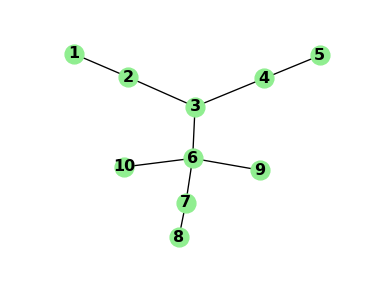

In [18]:
G = nx.Graph()
relations = [(1, 2), (2, 3), (3, 4), (4, 5), (3, 6), (6, 7,), (7, 8), (6, 9), (6, 10)] 
for i in relations:
    G.add_edge(i[0], i[1])

pr("Vertices reachable in 3 steps")
A = nx.adjacency_matrix(G).todense()
S = (A + A@A + A@A@A)
pn.Row( pn.pane.Matplotlib( draw_nxgraph(G), dpi=96,  height=250),
        pn.Column(pn.Spacer(height=20),
        pn.pane.LaTeX( 'S_3 = $'+format_matrix(S)+'$' )))

For example, starting from vertex 1, we cannot reach vertices 5,7,8,9 and 10 in 3 steps or less,<br>
whereas from node 2, we can reach all but node 8.

**Remarks:**
* The $\mathbf{k}$**-hop neighborhood** of a node $u$ are the nodes reachable in less than or equal $k$ steps.<br>
In the above example, the 3-hop neighborhood of node 5 is given by row 5 of $S_3$. It consists of the nodes $\left\{ 2, 3, 4, 5, 6 \right\}$
* $k$-hop neighborhoods are of interest in graph signal processing for example
* If we are only interested in the existence of a path from node $u$ to node $v$, and not in the number of possible paths,<br>
we may carry out the computations in $\mathbb{Z}_2$

# Eigenvalues of $G(A)$ and Paths between Vertices

<div style="background-color:#F2F5A9;color:black;">

**Theorem:** Let $G$ be a (multi)graph of order $n$ with eigenvalues $\lambda_1, \lambda_2, \dots \lambda_n$ of $G(A)$.<br>
$\qquad$ Then for any $l$ and for each entry $(i,j)$ of $G(A)^l$, there exist real coefficient $c_1, c_2, \dots c_n$ such that<br>
$\qquad$ $A(G)^l_{i j} = c_1 \lambda_1^l + c_2 \lambda_2^l \dots + c_n \lambda_n^l$.
</div>

**Proof:** This is a direct consequence of the spectral theorem $G(A)^l = \lambda_1^l q_1 q_1^t + \lambda_2^l q_2 q_2^t \dots + \lambda_n^l q_n q_n^t$

<div style="background-color:#F2F5A9;color:black;">

**Corollary:** Let $G$ be a (multi)graph of order $n$ with eigenvalues $\lambda_1, \lambda_2, \dots \lambda_n$ of $G(A)$.<br>
$\qquad$ Then for any $l$ the number of closed walks of length $l\;$ (i.e., walks terminating at the starting point)<br>
$\qquad$ is given by<br>
$\qquad$ $ \lambda_1^l + \lambda_2^l \dots + \lambda_n^l$.
</div>

**Proof:** Since the walks are closed, the number of closed walks of length $l$ is $\mathbf{trace\left( G(A)^l \right)}$,<br>
$\qquad$ i.e. the sum of the eigenvalues of $G(A)^l$.

## Example

<strong style="font-size:20px;height:25px;color:blue;"><p>A Multigraph and its Adjacency matrix representation</p></strong>

Row
    [0] Matplotlib(Figure, dpi=96, height=250)
    [1] Column
        [0] Spacer(height=20)
        [1] LaTeX(str, renderer='katex')
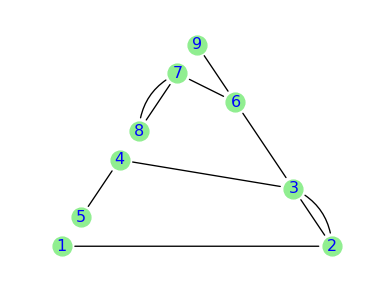

In [10]:
G = nx.MultiGraph()
for i in [(1,2,1), (2,3,2), (2,3,2), (3,4,1), (4,5,1), (3,6,1), (6,7,1),  (7,8,1), (7,8,2), (6,9,1)]:
    G.add_edge(i[0], i[1], l = i[2])

pr("<p>A Multigraph and its Adjacency matrix representation</p>")
A = nx.adjacency_matrix(G).todense()
pn.Row( pn.pane.Matplotlib( draw_nxmultigraph(G, arrows='-', layout=nx.planar_layout), dpi=96,  height=250),
        pn.Column(pn.Spacer(height=20),
        pn.pane.LaTeX( 'Adjacency Matrix $A(G) = '+format_matrix(A)+'$' )))

In [12]:
# Use eigenvalues to count close paths
E = np.linalg.eigh(A)
pr( f"The total number of closed walks of length 2 is {round(sum([i**2 for i in E.eigenvalues]))}")

<strong style="font-size:20px;height:25px;color:blue;">The total number of closed walks of length 2 is 28</strong>

**Remark**: This count includes every possible starting point. E.g., starting from node 2, the possible walks are
* $2\rightarrow 1 \rightarrow 2$
* $2 \xrightarrow{a} 3 \xrightarrow{a} 2$
* $2 \xrightarrow{b} 3 \xrightarrow{b} 2$
* $2 \xrightarrow{a} 3 \xrightarrow{b} 2$
* $2 \xrightarrow{b} 3 \xrightarrow{a} 2$